In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')

In [3]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [4]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
DF['World without China'] = DF.World - DF.China
#DF.index.rename('Date', inplace = True)

In [5]:
Countries = ['India', 'World', 'World without China',
                      'US', 'Italy', 'Spain', #'China', 'Germany',
                      'UK', 'France', 'Brazil',
                      #'S.Korea', 'Iran', 'Belgium', 'New Zealand', 
                       'Russia', 'Mexico']#[::-1]
Other_Countries = ['Belgium', 'Brazil', 'Canada', 'China', 'Ecuador', 'France', 'Germany',
       'India', 'Iran', 'Ireland', 'Italy', 'Mexico', 'Netherlands', 'Peru',
       'Portugal', 'Russia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'US',
       'UK', 'World', 'S.Korea']
colors = {'India': 'Blue', 'World': 'Blue', 'World without China': 'Green', 'US': 'Black', 'China': 'red', 
          'Spain': 'yellow','Italy': 'grey', 'Iran': 'brown', 'Ireland': 'violet', 'UK': 'Purple', 
          'S.Korea': 'Black', 'France': 'cyan', 'Germany': 'lime', 'Australia': 'Teal',
          'Russia': 'Brown', 'Mexico': 'Orange', 'Canada': 'Teal', 'Brazil': 'darkgreen', 'Belgium': 'cyan',
          'New Zealand': 'cyan'}

In [6]:
def plotter(DF, name, scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [7]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [8]:
Deaths = DF.copy()

In [9]:
Deaths[Countries].tail(5)

Country/Region,India,World,World without China,US,Italy,Spain,UK,France,Brazil,Russia,Mexico
2020-10-16,112998,1104354,1099615,218575,36427,33775,43519,33325,153214,23580,85704
2020-10-17,114031,1109833,1105094,219286,36474,33775,43669,33325,153675,23857,86059
2020-10-18,114610,1113178,1108439,219674,36543,33775,43736,33325,153675,24039,86167
2020-10-19,115197,1118159,1113420,220119,36616,33992,43816,33647,154176,24205,86338
2020-10-20,115914,1124744,1120005,221052,36705,34210,44057,33928,154837,24473,86893


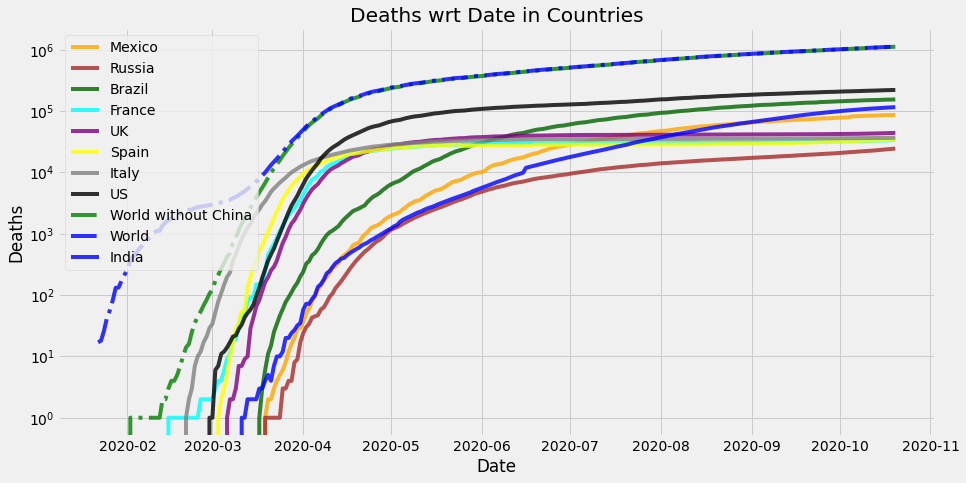

In [10]:
plotter(Deaths, 'Deaths')

In [11]:
Biweekly_Deaths = np.round((Deaths - Deaths.shift(14))/14, 2)
Biweekly_Deaths = Biweekly_Deaths.fillna(0)#.astype('int')
Biweekly_Deaths[Countries].tail(5)

Country/Region,India,World,World without China,US,Italy,Spain,UK,France,Brazil,Russia,Mexico
2020-10-16,868.29,5456.29,5456.29,705.57,34.71,120.64,82.93,82.43,609.57,185.64,515.14
2020-10-17,874.93,5465.29,5465.29,707.29,36.14,120.64,90.14,82.43,549.14,193.14,512.79
2020-10-18,851.79,5435.36,5435.36,710.93,39.79,120.64,92.57,82.43,523.07,198.50,505.64
2020-10-19,830.57,5290.64,5290.64,709.86,43.86,126.21,96.93,95.00,535.79,202.14,318.64
2020-10-20,811.36,5347.79,5347.79,726.14,48.21,123.14,108.71,110.36,524.50,208.14,324.64


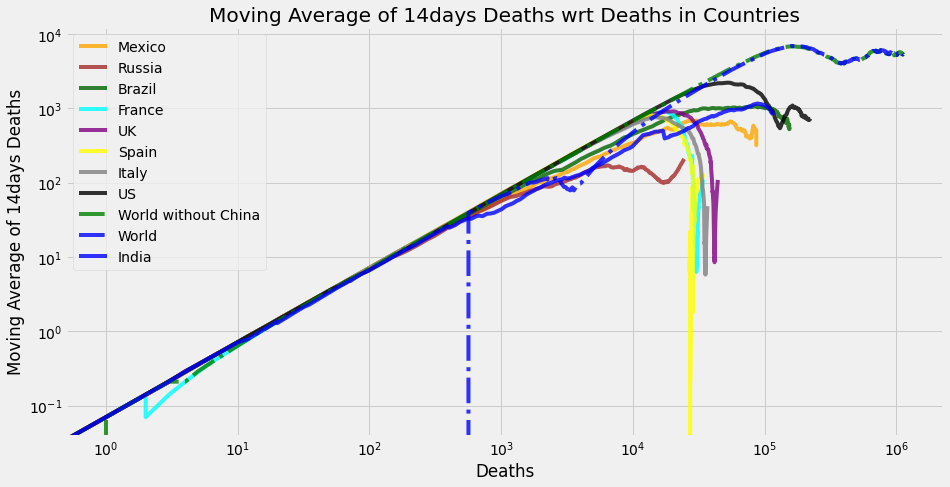

In [12]:
plotwrtDeaths(Biweekly_Deaths, 'Moving Average of 14days Deaths', Deaths)

In [13]:
Weekly_Deaths = np.round((Deaths - Deaths.shift(7))/7)
Weekly_Deaths = Weekly_Deaths.fillna(0).astype('int')
Weekly_Deaths[Countries].tail(5)

Country/Region,India,World,World without China,US,Italy,Spain,UK,France,Brazil,Russia,Mexico
2020-10-16,797,5187,5187,689,45,121,107,103,511,206,315
2020-10-17,814,5281,5281,702,48,121,117,103,497,218,345
2020-10-18,780,5202,5202,701,54,121,117,103,455,224,341
2020-10-19,763,5353,5353,719,59,124,122,135,498,230,342
2020-10-20,761,5514,5514,738,66,144,136,135,548,234,353


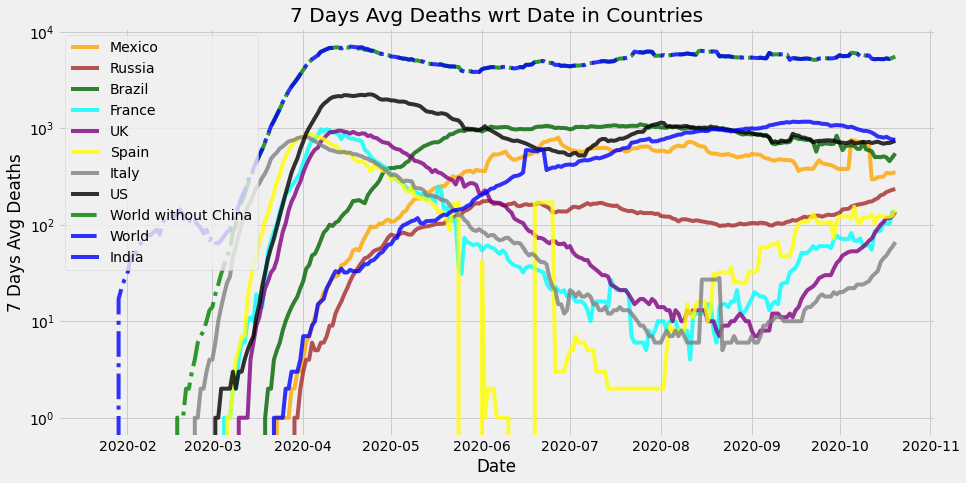

In [14]:
plotter(Weekly_Deaths, '7 Days Avg Deaths')

In [15]:
ThreeDaysDeaths = np.round((Deaths - Deaths.shift(3))/3)
ThreeDaysDeaths = ThreeDaysDeaths.fillna(0).astype('int')
ThreeDaysDeaths[Countries].tail(5)

Country/Region,India,World,World without China,US,Italy,Spain,UK,France,Brazil,Russia,Mexico
2020-10-16,804,6069,6069,896,60,190,137,114,739,249,428
2020-10-17,922,5895,5895,805,62,121,141,89,643,263,387
2020-10-18,816,4975,4975,661,57,74,118,60,405,230,294
2020-10-19,733,4602,4602,515,63,72,99,107,321,208,211
2020-10-20,628,4970,4970,589,77,145,129,201,387,205,278


In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,World without China,US,Italy,Spain,UK,France,Brazil,Russia,Mexico
2020-10-16,837,6100,6100,883,55,222,136,179,754,230,419
2020-10-17,1033,5479,5479,711,47,0,150,0,461,277,355
2020-10-18,579,3345,3345,388,69,0,67,0,0,182,108
2020-10-19,587,4981,4981,445,73,217,80,322,501,166,171
2020-10-20,717,6585,6585,933,89,218,241,281,661,268,555


In [17]:
Reproductivity = np.round(Weekly_Deaths/Biweekly_Deaths.shift(8), 4)#.iloc[-1]
Reproductivity[Countries].iloc[-1]

Country/Region
India                  0.7870
World                  0.9786
World without China    0.9786
US                     1.0319
Italy                  2.6097
Spain                  1.1769
UK                     2.1760
France                 1.9708
Brazil                 0.8889
Russia                 1.4274
Mexico                 0.6731
Name: 2020-10-20 00:00:00, dtype: float64

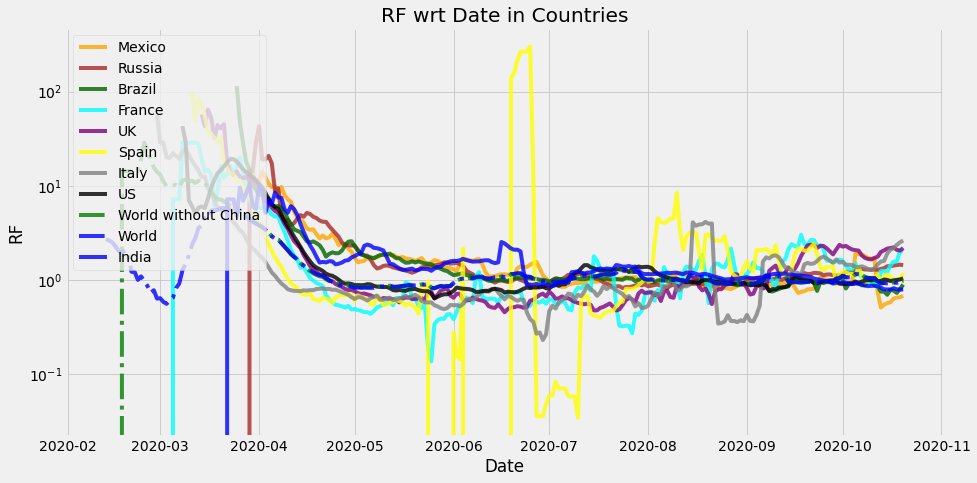

In [18]:
plotter(Reproductivity, 'RF')
pd.melt(Reproductivity).to_csv('CSVs/Reproductivity.csv')

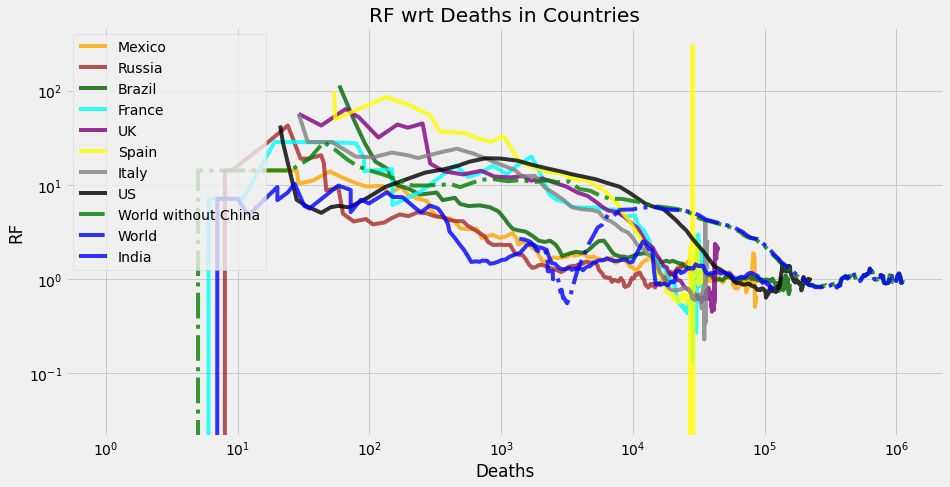

In [19]:
plotwrtDeaths(Reproductivity, 'RF', Deaths)

In [20]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

In [21]:
D = {
    'Deaths':Deaths,
    'Biweekly Deaths':Biweekly_Deaths,
    'Weekly Deaths': Weekly_Deaths,
    'Triday Deaths': ThreeDaysDeaths,
    'Daily Deaths':Daily_Deaths,
    'Reproductive Factor':Reproductivity,
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
All_lastday = LastDay_DF
# LastDay_DF = LastDay_DF[LastDay_DF.Deaths>=4000]

In [22]:
Growth = np.round(Weekly_Deaths/Deaths, 4)
#Growth = Growth.fillna(0)
Growth[Countries].tail(5)

Country/Region,India,World,World without China,US,Italy,Spain,UK,France,Brazil,Russia,Mexico
2020-10-16,0.0071,0.0047,0.0047,0.0032,0.0012,0.0036,0.0025,0.0031,0.0033,0.0087,0.0037
2020-10-17,0.0071,0.0048,0.0048,0.0032,0.0013,0.0036,0.0027,0.0031,0.0032,0.0091,0.0040
2020-10-18,0.0068,0.0047,0.0047,0.0032,0.0015,0.0036,0.0027,0.0031,0.0030,0.0093,0.0040
2020-10-19,0.0066,0.0048,0.0048,0.0033,0.0016,0.0036,0.0028,0.0040,0.0032,0.0095,0.0040
2020-10-20,0.0066,0.0049,0.0049,0.0033,0.0018,0.0042,0.0031,0.0040,0.0035,0.0096,0.0041


In [23]:
def days100(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]

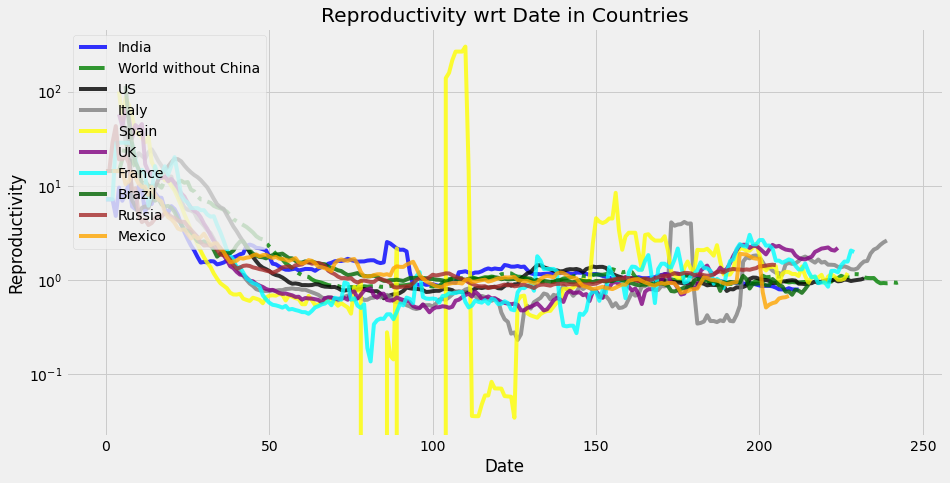

In [24]:
RF = days100(Reproductivity)#.tail(100)
plotter(RF[[cun for cun in Countries if cun not in ['China', 'World']]], 'Reproductivity', col = 'all')

In [25]:
LastDay_DF.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Uzbekistan', 'Venezuela', 'Vietnam', 'West Bank and Gaza',
       'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe', 'World',
       'World without China'],
      dtype='object', name='Country', length=191)

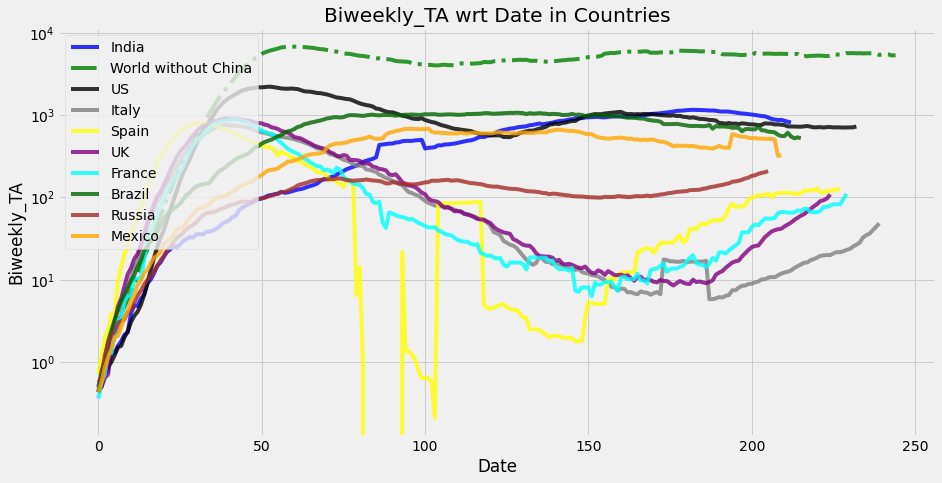

In [26]:
BD = days100(Biweekly_Deaths)
plotter(BD[[cun for cun in Countries if cun not in ['China', 'World']]], 'Biweekly_TA', col = 'all')

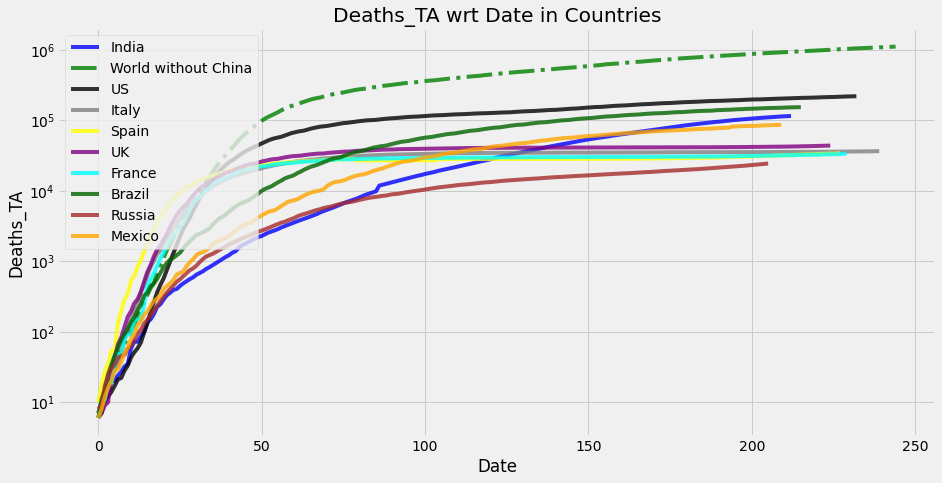

In [27]:
D = days100(Deaths)
plotter(D[[cun for cun in Countries if cun not in ['China', 'World']]], 'Deaths_TA', col = 'all')

In [28]:
def TA(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [0 for _ in range(len(X[col]) - len(L))]
    return X

In [29]:
def csvify(X, name):
    DF = X.copy()
    DF['Date'] = DF.index
    DF = pd.melt(DF, id_vars = 'Date')
    DF.to_csv(f'CSVs\\{name}.csv', index = False)

In [30]:
for name, df in {'Deaths': Deaths, 
           'BiweeklyDeaths': Biweekly_Deaths,
           'Daily_Deaths': Daily_Deaths,
           'Reproductivity': Reproductivity,
          }.items():
    csvify(df, name)
    csvify(TA(df), 'TA_' + name)

In [31]:
LastDay_DF.sort_values('Deaths', ascending = False).head(10)

,Deaths,Biweekly Deaths,Weekly Deaths,Triday Deaths,Daily Deaths,Reproductive Factor
Country,,,,,,
World,1124744,5347.79,5514,4970,6585,0.9786
World without China,1120005,5347.79,5514,4970,6585,0.9786
US,221052,726.14,738,589,933,1.0319
Brazil,154837,524.50,548,387,661,0.8889
India,115914,811.36,761,628,717,0.7870
Mexico,86893,324.64,353,278,555,0.6731
UK,44057,108.71,136,129,241,2.1760
Italy,36705,48.21,66,77,89,2.6097
Spain,34210,123.14,144,145,218,1.1769


In [32]:
LastDay_DF.sort_values('Weekly Deaths', ascending = False).head(10)

,Deaths,Biweekly Deaths,Weekly Deaths,Triday Deaths,Daily Deaths,Reproductive Factor
Country,,,,,,
World without China,1120005,5347.79,5514,4970,6585,0.9786
World,1124744,5347.79,5514,4970,6585,0.9786
India,115914,811.36,761,628,717,0.7870
US,221052,726.14,738,589,933,1.0319
Brazil,154837,524.50,548,387,661,0.8889
Argentina,27100,376.64,361,331,384,0.6260
Mexico,86893,324.64,353,278,555,0.6731
Iran,31034,258.21,281,304,322,1.2953
Russia,24473,208.14,234,205,268,1.4274


In [33]:
LastDay_DF[(LastDay_DF['Reproductive Factor']>.8) & (LastDay_DF['Weekly Deaths']>100)]

,Deaths,Biweekly Deaths,Weekly Deaths,Triday Deaths,Daily Deaths,Reproductive Factor
Country,,,,,,
Brazil,154837,524.50,548,387,661,0.8889
Colombia,29272,161.07,162,156,170,0.9676
France,33928,110.36,135,201,281,1.9708
Indonesia,12734,97.14,101,101,117,0.9672
Iran,31034,258.21,281,304,322,1.2953
Russia,24473,208.14,234,205,268,1.4274
Spain,34210,123.14,144,145,218,1.1769
US,221052,726.14,738,589,933,1.0319
UK,44057,108.71,136,129,241,2.1760


In [34]:
LastDay_DF[(LastDay_DF['Weekly Deaths'] == 0) & (LastDay_DF.Deaths > 100)]

,Deaths,Biweekly Deaths,Weekly Deaths,Triday Deaths,Daily Deaths,Reproductive Factor
Country,,,,,,
Australia,905,0.57,0,0,0,0.0
Cameroon,425,0.36,0,1,1,0.0
China,4739,0.00,0,0,0,NaN
Cote d'Ivoire,121,0.07,0,0,0,NaN
Eswatini,116,0.29,0,0,0,0.0
Gambia,118,0.07,0,0,0,0.0
Ghana,312,0.64,0,1,2,0.0
Haiti,231,0.14,0,0,0,0.0
Luxembourg,136,0.57,0,1,1,0.0


In [35]:
dt.datetime.now()

datetime.datetime(2020, 10, 21, 20, 57, 9, 397872)